# Task L5

**Description**: KNN classification

**1. Iris dataset**
```
    load iris dataset
    split to train and test
    train KNN classifiers for different K
    choose the best K determined on test set
```
**2. Synthetic dataset**
```
    generrate synthetic dataset
    split to train and test
    train KNN regressors for different K
    choose the best K determined on test set
    visualize the decision boundary
```
### 1. Import necessary libraries

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris, make_blobs 
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

### 2. Load Iris dataset

In [75]:
np.random.seed = 2021

iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['label'] = y
features_dict = {k: v for k, v in enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris.head()

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### 3. Split into train and test

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021) # 70% training and 30% test, random_state=2025

### 4. Train KNN classifiers for different K

In [77]:
k_best, score_best = None, 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k) # is the hyperparameter
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test) # predict the response for test dataset
    score = accuracy_score(y_test, y_pred)
    if score > score_best:
        k_best, score_best = k, score

print(f'The best k = {k_best}, score = {score_best}')

The best k = 6, score = 1.0


### 5. Generate synthetic dataset

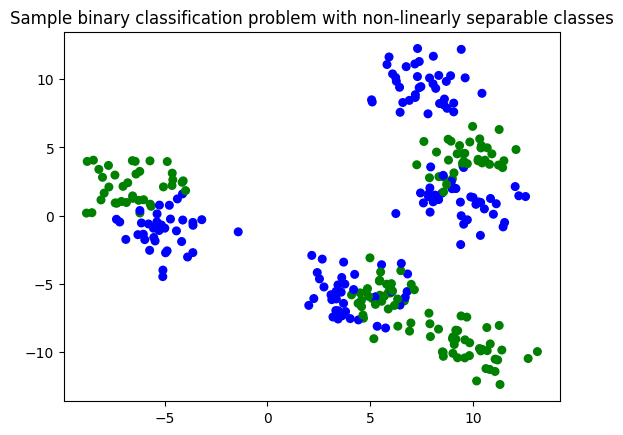

In [78]:
X_D2, y_D2 = make_blobs(n_samples=300, n_features=2, centers=8, cluster_std=1.3, random_state=4)
y_D2 = y_D2 % 2
cmap_bold = ListedColormap(['blue', 'green'])
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, marker='o', s=30, cmap=cmap_bold)
plt.show()

### 6. Split into train and test

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.3, random_state=2021) # 70% training and 30% test, random_state=2025

### 7. Train KNN regressors for different K

In [80]:
k_best, score_best = None, float('inf')
for k in range(1, 21):
    knn_reg = KNeighborsRegressor(n_neighbors=k) # is the hyperparameter
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if mse < score_best:
        k_best, score_best = k, mse
        
print(f'The best k = {k_best}, score = {score_best}')

The best k = 5, score = 0.06888888888888889


### 6. Visualize decision boundary

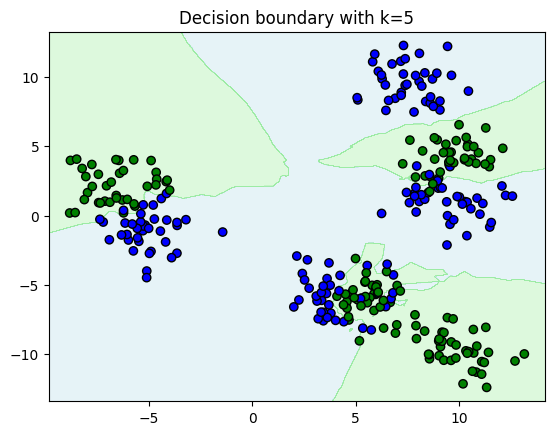

In [82]:
h = .02
x_min, x_max = X_D2[:, 0].min() - 1, X_D2[:, 0].max() + 1
y_min, y_max = X_D2[:, 1].min() - 1, X_D2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # returns coordinate matrices from coordinate vectors
knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_D2, y_D2)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) # flattens the array
plt.figure()
plt.contourf(xx, yy, Z, cmap=ListedColormap(['lightblue', 'lightgreen']), alpha=0.3)
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, cmap=cmap_bold, edgecolor='k')
plt.title(f'Decision boundary with k={k_best}')
plt.show()